# **Primer examen - Análsiis de Datos con Python**
## Maestría en Matemáticas Aplicadas e Industriales
## Alumno: Brandon Eduardo Antonio Gómez

1. Implementa una función que:

Estandarice un vector usando la fórmula min-max.
Calcule el valor de IDN(x)

In [402]:
# cálculo del índice de dispersión (IDN)
def indice_dispersion(x):
  n = len(x)
  min_x = min(x)
  max_x = max(x)

  # se estandariza
  zi = []
  for i in range(n):
    xi = x[i]
    zi.append((xi-min_x)/(max_x-min_x))

  suma_z = sum(zi)
  media_zi = suma_z/n

  # cáculo de IDN(X)
  suma_cuadrados = 0
  for i in range(n):
    suma_cuadrados += (zi[i]-media_zi)**2
  idn = suma_cuadrados/n
  return idn

In [403]:
X = [12.4, 8.1, 15.7, 9.3, 14.8, 10.2, 11.6]
print( "IDN(X)=", indice_dispersion(X))


IDN(X)= 0.11642828876703037


In [404]:
# cáculos usando np.var()
import numpy as np
X = np.array([12.4, 8.1, 15.7, 9.3, 14.8, 10.2, 11.6])
z = (x-np.min(x))/(np.max(x)-np.min(x))
varianza_z = np.var(z)
print("La varianza de Z con np.var() es:", varianza_z)

La varianza de Z con np.var() es: 0.08366733466933866


Los valores sí coinciden ya que $IDN(X)$ es un estimador asintóticamente insesgado de la varianza poblacional y `np.var()`  calcula la varianza de la misma forma

2. se tiene la siguiente función entre x,y,z

In [405]:
# se cargan las liberias
import numpy as np
import matplotlib.pyplot as plt


In [406]:
# se z para obtener la función a partir de: sen(x+y)=tan(e^cos(x+y)-lnz/)
# 2arctan(sen(x+y))=(e^cos(x+y)-lnz)

# ln(z)=e^cos(x+y)-2*arctan(sen(x+y))
# z = e^[e^cos(x+y)-2*arctan(sen(x+y)]=f(x,y)


In [407]:
# se grafica la función sobre [-10, 10]X[-10, 10]
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X,Y = np.meshgrid(x,y)

u = X +Y

Z = np.zeros_like(u)


In [408]:
# región a graficar
region1 = u <= 1/2
region2 = u > 1/2

Z[region1] = 20
Z[region2] = np.exp(np.exp(np.cos(u[region2])-2*np.arctan(np.sin((u)[region2]))))


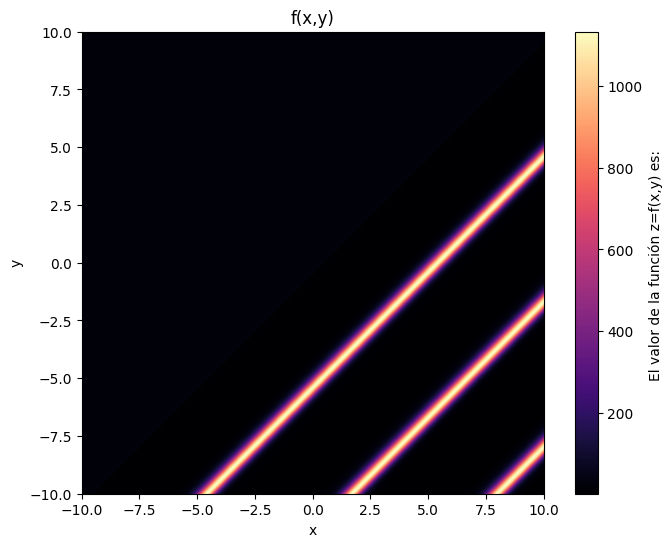

In [409]:
# visualizar la funcion z = e^[e^cos(x+y)-2*arctan(sen(x+y)]=f(x,y)
plt.figure(figsize=(8,6))
plt.imshow(Z, extent=[-10,10,-10,10], cmap = 'magma')
plt.colorbar(label = "El valor de la función z=f(x,y) es: ")
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x,y)')
plt.show()


3.

In [410]:
# se cargan la librería pandas

import pandas as pd

# se cargan los datos de nacimientos del 2020
ruta_1 = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/nacimientos_2020.csv'
df_2020 = pd.read_csv(ruta_1)
#df_nac_2020.head()


ruta_2 = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/nacimientos_2021.csv'
df_nac_2021 = pd.read_csv(ruta_2)
#df_nac_2021.head()

ruta_3 = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/nacimientos_2022.csv'
df_nac_2022 = pd.read_csv(ruta_3)
#df_nac_2022.head()

df_nac_total = pd.concat([df_2020, df_nac_2021, df_nac_2022])
df_nac_total.head()

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
0,Aguascalientes,AG,Noreste,9966,10404,0,20370
1,Baja California,BC,Noroeste,23539,24406,0,47945
2,Baja California Sur,BS,Noroeste,4982,5099,0,10081
3,Campeche,CM,Sureste,5275,5454,0,10729
4,Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815


a) Obtenga un Dataframe que tenga como columnas el número de nacimientos de mujeres, el número de nacimientos de hombres y el número total de nacimientos por año durante el 2020 al 2022. Obtenga una gráfica de cada categoría.

In [411]:
# Agregar columna 'año' a cada DataFrame
df_2020['año'] = 2020
df_nac_2021['año'] = 2021
df_nac_2022['año'] = 2022

# se concatenan
df_total = pd.concat([df_2020, df_nac_2021, df_nac_2022], ignore_index=True)

# Agrupar por año y estado sumando nacimientos
df_anio = df_total.groupby(['año', 'Estado'])[['Mujeres', 'Hombres', 'No_esp', 'Total']].sum().reset_index()

df_anio.head(100)


,año,Estado,Mujeres,Hombres,No_esp,Total
0,2020,Aguascalientes,9966,10404,0,20370
1,2020,Baja California,23539,24406,0,47945
2,2020,Baja California Sur,4982,5099,0,10081
3,2020,CDMX,32218,33485,0,65703
4,2020,Campeche,5275,5454,0,10729
...,...,...,...,...,...,...
91,2022,Tamaulipas,23177,24110,0,47287
92,2022,Tlaxcala,9653,9964,1,19618
93,2022,Veracruz,53782,55329,0,109111
94,2022,Yucatan,13829,14103,0,27932


In [412]:
df_total.head()

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total,año
0,Aguascalientes,AG,Noreste,9966,10404,0,20370,2020
1,Baja California,BC,Noroeste,23539,24406,0,47945,2020
2,Baja California Sur,BS,Noroeste,4982,5099,0,10081,2020
3,Campeche,CM,Sureste,5275,5454,0,10729,2020
4,Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815,2020


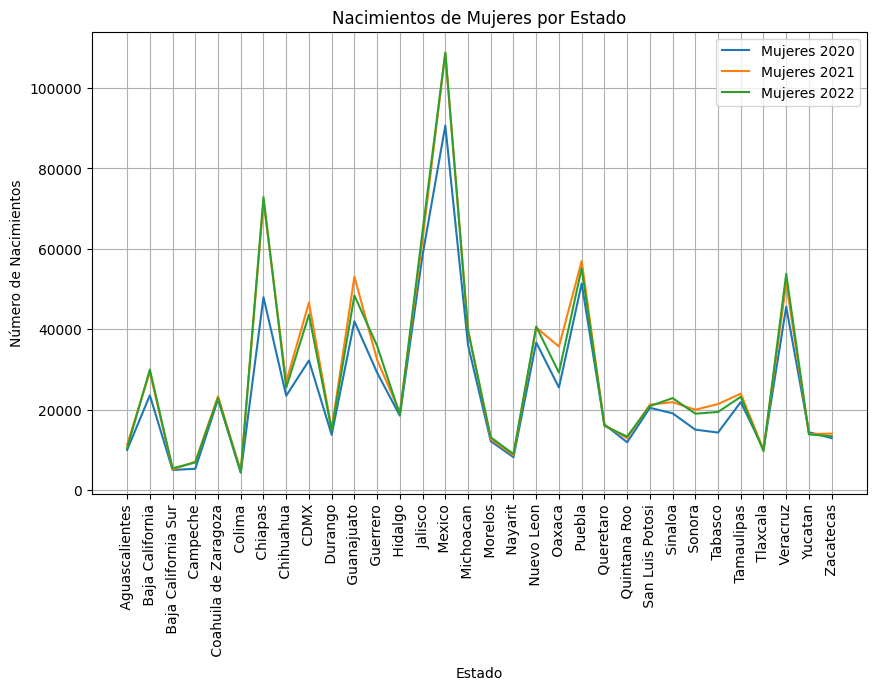

In [413]:
df_2020 = df_total[df_total['año'] == 2020]
df_nac_2021 = df_total[df_total['año'] == 2021]
df_nac_2022 = df_total[df_total['año'] == 2022]

# Gráfica para Mujeres
plt.figure(figsize=(10,6))
plt.plot(df_2020['Estado'], df_2020['Mujeres'], label='Mujeres 2020')
plt.plot(df_nac_2021['Estado'], df_nac_2021['Mujeres'], label='Mujeres 2021')
plt.plot(df_nac_2022['Estado'], df_nac_2022['Mujeres'], label='Mujeres 2022')

plt.title('Nacimientos de Mujeres por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Nacimientos')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

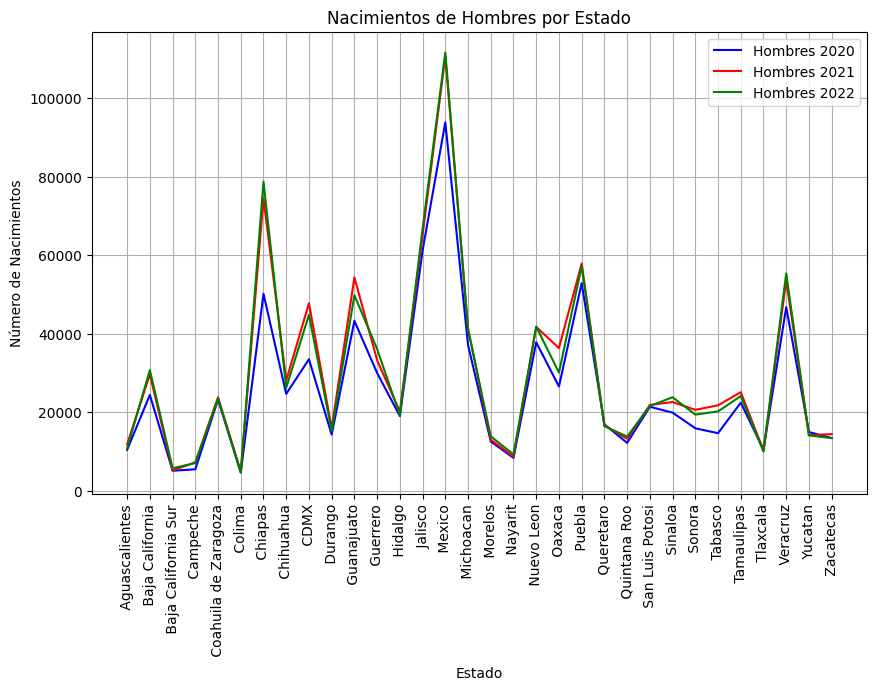

In [414]:
# Gráfica para Hombres

plt.figure(figsize=(10,6))
plt.plot(df_2020['Estado'], df_2020['Hombres'], label='Hombres 2020', color = 'blue')
plt.plot(df_nac_2021['Estado'], df_nac_2021['Hombres'], label='Hombres 2021', color = 'red')
plt.plot(df_nac_2022['Estado'], df_nac_2022['Hombres'], label='Hombres 2022', color = 'green')

plt.title('Nacimientos de Hombres por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Nacimientos')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

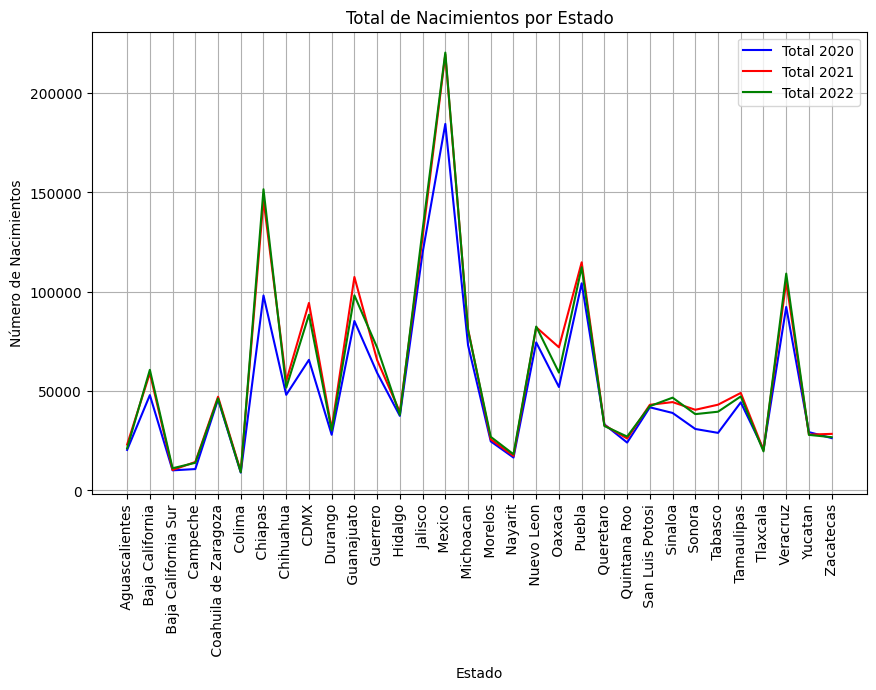

In [415]:
# Gráfica para Hombres

plt.figure(figsize=(10,6))
plt.plot(df_2020['Estado'], df_2020['Total'], label='Total 2020', color = 'blue')
plt.plot(df_nac_2021['Estado'], df_nac_2021['Total'], label='Total 2021', color = 'red')
plt.plot(df_nac_2022['Estado'], df_nac_2022['Total'], label='Total 2022', color = 'green')

plt.title('Total de Nacimientos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Nacimientos')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

## b) Agregue a los datos de nacimientos del 2020 la columna de población por estado y la tasa de nacimientos por cada mil habitantes. Gráfique la tasa de nacimientos por estado.

In [416]:
ruta_2020 = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/nacimientos_2020.csv'
df_2020 = pd.read_csv(ruta_2020)
df_2020.head()

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
0,Aguascalientes,AG,Noreste,9966,10404,0,20370
1,Baja California,BC,Noroeste,23539,24406,0,47945
2,Baja California Sur,BS,Noroeste,4982,5099,0,10081
3,Campeche,CM,Sureste,5275,5454,0,10729
4,Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815


In [417]:
# para los naciemientos del 2020 se agrega la columna de población por estado y la tasa de nacimientos por cada mil habitantes
ruta_poblacion = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/poblacion.csv'
df_poblacion = pd.read_csv(ruta_poblacion)
df_poblacion.head()


,Estado,Regiones,H_1990,M_1990,H_2000,M_2000,H_2010,M_2010,H_2020,M_2020
0,Aguascalientes,Noreste,350218,369441,456533,487752,576638,608358,696683,728924
1,Baja California,Noroeste,832090,828765,1252581,1234786,1591610,1563460,1900589,1868431
2,Baja California Sur,Noroeste,161833,155931,216250,207791,325433,311593,405879,392568
3,Campeche,Sureste,268772,266413,344334,346355,407721,414720,456939,471424
4,Coahuila de Zaragoza,Noreste,979097,993243,1140195,1157875,1364197,1384194,1563669,1583102


In [418]:
df_2020['Total'] = df_2020['Mujeres'] + df_2020['Hombres'] + df_2020['No_esp']

In [419]:
df_2020.head()

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
0,Aguascalientes,AG,Noreste,9966,10404,0,20370
1,Baja California,BC,Noroeste,23539,24406,0,47945
2,Baja California Sur,BS,Noroeste,4982,5099,0,10081
3,Campeche,CM,Sureste,5275,5454,0,10729
4,Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815


In [420]:
df_2020['Poblacion'] = df_poblacion['H_2020'] + df_poblacion['M_2020']

La tasa por cada 1000 habitantes se obtiene como:
$$Tasa= \frac{\text{Total nacimientos}}{\text{población}}⋅1000$$

In [421]:
df_2020['Tasa'] = (df_2020['Total'] / df_2020['Poblacion']) * 1000

In [422]:
df_2020.head()

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total,Poblacion,Tasa
0,Aguascalientes,AG,Noreste,9966,10404,0,20370,1425607,14.288650
1,Baja California,BC,Noroeste,23539,24406,0,47945,3769020,12.720813
2,Baja California Sur,BS,Noroeste,4982,5099,0,10081,798447,12.625760
3,Campeche,CM,Sureste,5275,5454,0,10729,928363,11.556902
4,Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815,3146771,14.559369


In [423]:
df_2020 = df_2020.sort_values(by='Tasa', ascending=False)
df_2020.head()

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total,Poblacion,Tasa
6,Chiapas,CS,Sureste,47962,50136,0,98098,5543828,17.694993
11,Guerrero,GR,Centro-Sur,29174,29976,0,59150,3540685,16.705807
31,Zacatecas,ZA,Noreste,12890,13419,0,26309,1622138,16.218719
20,Puebla,PU,Centro-Sur,51363,52865,0,104228,6583278,15.832234
15,Michoacan,MI,Occidente,36028,37086,1,73115,4748846,15.396372


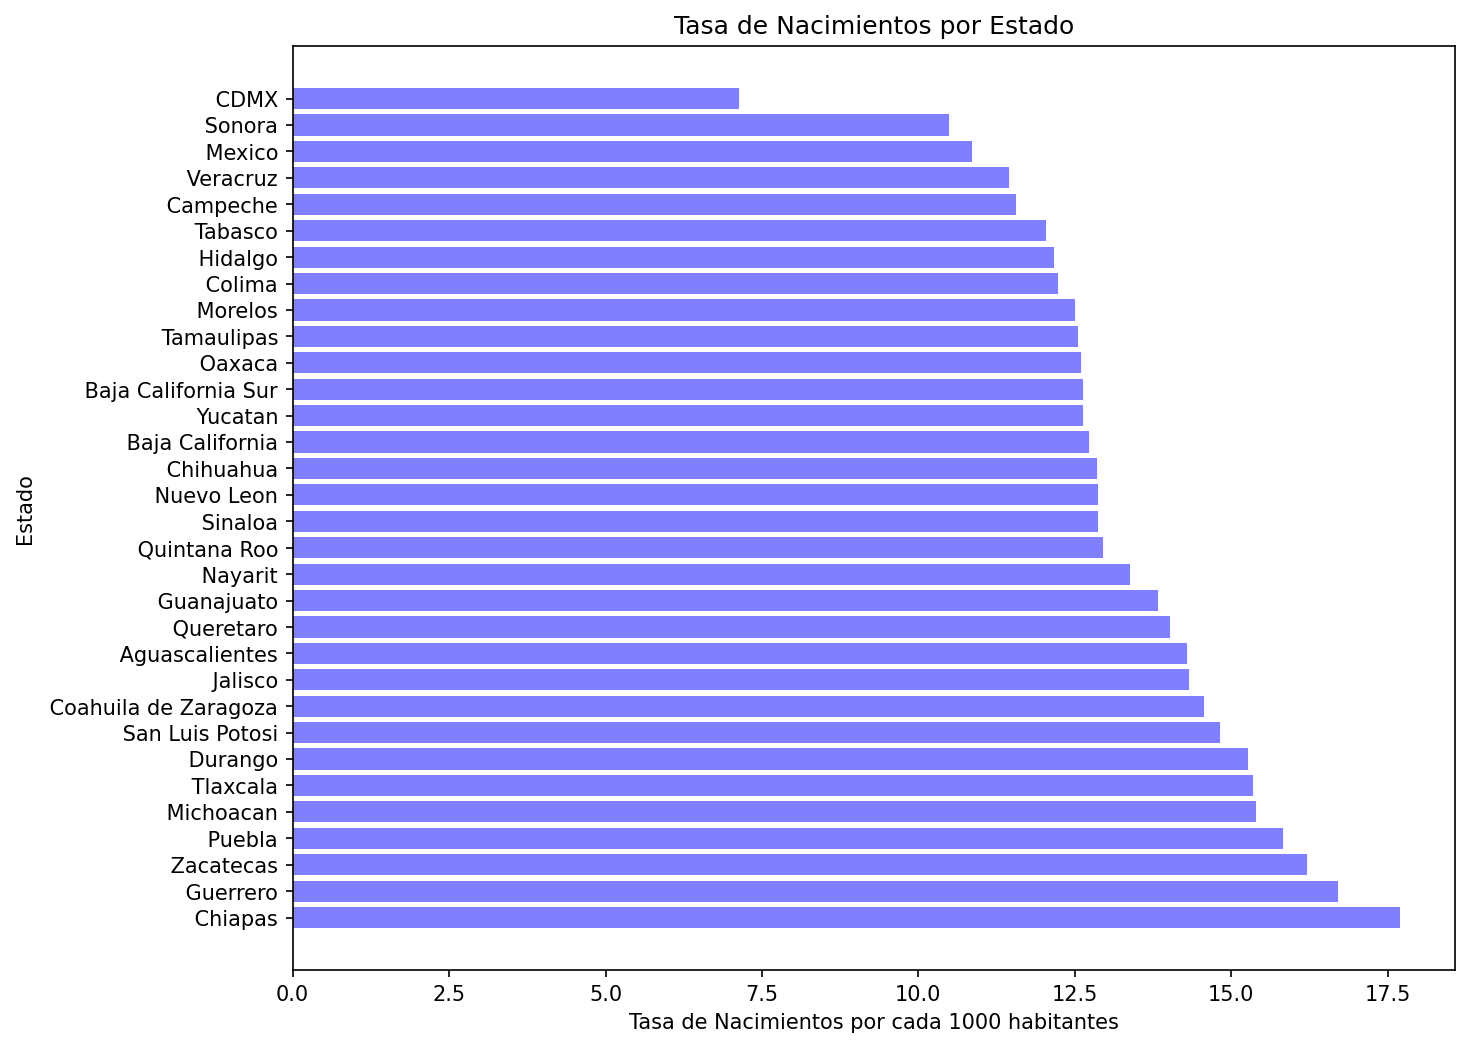

In [424]:
# Gráfica de la tasa de nacimiento por estado

plt.figure(figsize=(10,8), dpi = 150)
plt.barh(df_2020['Estado'], df_2020['Tasa'], color = 'blue', alpha = 0.5) # barh: gráfica de barras horizontal
plt.xlabel('Tasa de Nacimientos por cada 1000 habitantes')
plt.ylabel('Estado')
plt.title('Tasa de Nacimientos por Estado')
plt.show()

4.

In [425]:
ruta_Tesla = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/tesla.csv'
df_Tesla = pd.read_csv(ruta_Tesla, parse_dates= True, index_col=0)
df_Tesla.head( )

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334


a) Agregue la columna correspondiente a la serie de retornos simples (utilice la función .pct_change()) y elimine la primera fila del DataFrame.

In [426]:
df_Tesla['Retornos simples'] = df_Tesla['Close'].pct_change()
df_Tesla.head()


,Open,High,Low,Close,Adj Close,Retornos simples
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,NaN
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,0.029633
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,0.019255
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,0.038801
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,0.049205


b) Grafique la serie de tiempo de los retornos simples y obtenga:

* El retorno simple más alto,
* El retorno simple más bajo,
* Las fechas en que ocurrieron.

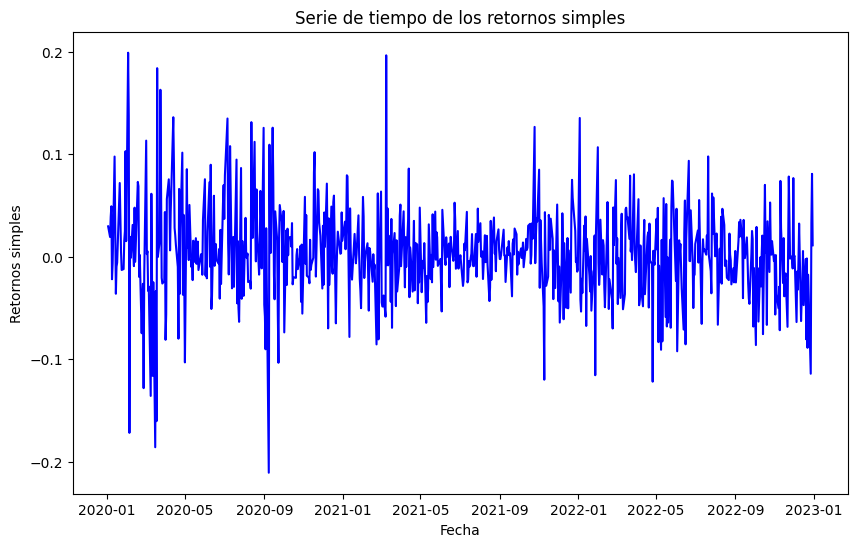

In [427]:
plt.figure(figsize=(10,6))
plt.plot(df_Tesla.index, df_Tesla['Retornos simples'], color = 'blue')
plt.xlabel('Fecha')
plt.ylabel('Retornos simples')
plt.title('Serie de tiempo de los retornos simples')
plt.show()

Los retorno más altos se obtuevieorn en:

In [428]:
df_Tesla.idxmax()

,0
Open,2021-11-04
High,2021-11-04
Low,2021-11-04
Close,2021-11-04
Adj Close,2021-11-04
Retornos simples,2020-02-03


In [429]:
df_Tesla.idxmax()[5]

/tmp/ipython-input-429-1043891864.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Tesla.idxmax()[5]


Timestamp('2020-02-03 00:00:00')

fue el 03 de febrero de 2020

In [430]:
df_Tesla.loc[df_Tesla.idxmax()[5]][5]

/tmp/ipython-input-430-650623207.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Tesla.loc[df_Tesla.idxmax()[5]][5]


np.float64(0.19894859586288027)

el retorno más alto fue de $0.1989

Los retornos simples más bajos se obtuvieron en:

In [431]:
df_Tesla.idxmin()

,0
Open,2020-03-19
High,2020-03-18
Low,2020-03-18
Close,2020-03-18
Adj Close,2020-03-18
Retornos simples,2020-09-08


In [432]:
df_Tesla.idxmin()[5] # fecha de retorno más baja

/tmp/ipython-input-432-31398755.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Tesla.idxmin()[5] # fecha de retorno más baja


Timestamp('2020-09-08 00:00:00')

fue el 08 de septiembre de 2020

In [433]:
df_Tesla.loc[df_Tesla.idxmin()[5]][5]

/tmp/ipython-input-433-3651843.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Tesla.loc[df_Tesla.idxmin()[5]][5]


np.float64(-0.2106282385165198)

el retorno más bajo (pérdida) fue de $0.2106

c) Obtenga el histograma de frecuencia de la serie de retornos simples.
¿Estos se distribuyen normalmente? Justifique su respuesta calculando el coeficiente de asimetría, kurtosis y haciendo la prueba de Shapiro–Wilk.

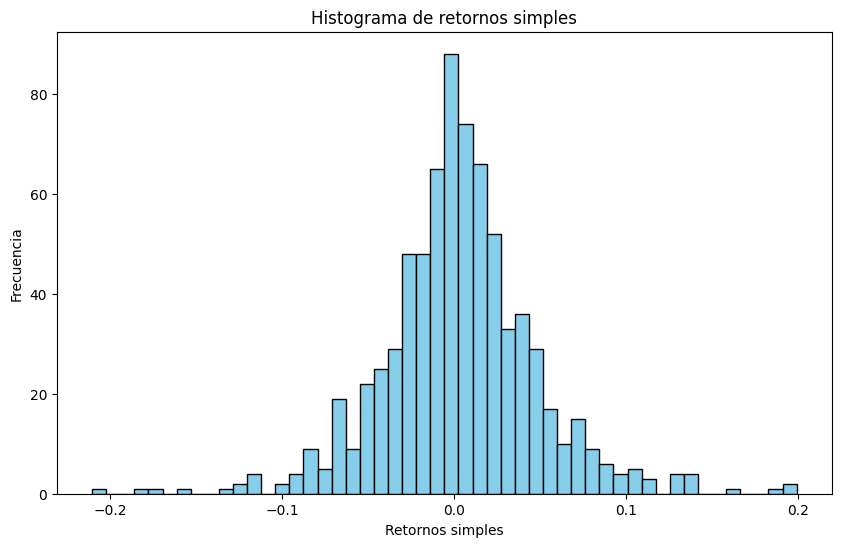

In [434]:
# Histrograma de retornos simples
plt.figure(figsize=(10,6))
plt.hist(df_Tesla['Retornos simples'], bins=50, color = 'skyblue',
      edgecolor='black') # edgecolor='black' da el color de borde de las barras
plt.xlabel('Retornos simples')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos simples')
plt.show()

Visualmente el histograma muestra una tendencia normal, pero para justificar se calcularán los coeficientes se asimetría y curtosis

In [435]:
df_Tesla['Retornos simples'].skew() # asimetría

np.float64(0.08619747048670622)

como el coeficiente de asimetría es positivo, implica que tiene un sesgo a la derecha

In [436]:
df_Tesla['Retornos simples'].kurtosis() # curtosis

np.float64(2.7456294768903464)

como la curtosis es positiva impplica que la distribución es leptocúrtica, es decir tiene las colas más largas que la distribución normal

**Prueba de Shapiro-Wilk**

Como prueba de normalidad, se establecen las siguientes hipótesis:

Hipótesis nula $(H_0)$: La muestra proviene de una distribución normal.
Aceptamos $H_0$
 si el $valor-p>0.05$

Hipótesis alternativa $(
H_a)$: La muestra no proviene de una distribución normal.
Aceptamos $H_a$
 si el $valor-p <0.05$

Un valor
, indica evidencia suficiente contra la normalidad de los datos, sugiriendo que se rechace
.

In [437]:
from scipy.stats import shapiro


In [438]:
# Prueba de Shapiro-Wilk para los retornos simples
valor_p = shapiro(df_Tesla['Retornos simples'])[1]
valor_p

np.float64(nan)

In [439]:
# Elimina valores NaN antes de aplicar la prueba
datos = df_Tesla['Retornos simples'].dropna()

# Usa una muestra si es muy grande
if len(datos) > 5000:
    datos = datos.sample(500, random_state=42)

stat, p = shapiro(datos)
print(f"Shapiro-Wilk: estadístico = {stat:.4f}, valor-p = {p:.4f}")


Shapiro-Wilk: estadístico = 0.9644, valor-p = 0.0000




como $valor-p>0.05$ los datos tienen una distribución normal

d) Genere las gráficas de caja por año de los precios de cierre.



In [440]:
# gráficas de caja por año de los precios de cierre 'Çlose'
df_Tesla['Año'] = df_Tesla.index.year
df_Tesla.head()

,Open,High,Low,Close,Adj Close,Retornos simples,Año
Date,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,NaN,2020
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,0.029633,2020
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,0.019255,2020
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,0.038801,2020
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,0.049205,2020


Text(0, 0.5, 'Año')

<Figure size 1000x600 with 0 Axes>

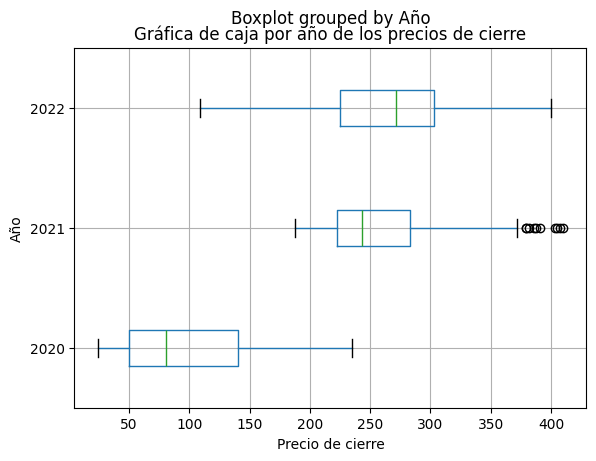

In [441]:
# grafica de caja
plt.figure(figsize=(10,6))
df_Tesla.boxplot(column='Close', by='Año', vert=False)
plt.title('Gráfica de caja por año de los precios de cierre')
plt.xlabel('Precio de cierre')
plt.ylabel('Año')

se puede observar que en 2022 fue cuando obtuvo mayores precios de cierre, mientras que en el 2020 fueron los más bajos

5. Guarde en un DataFrame los datos de los 6 contaminantes principales de la ciudad de Puebla a partir del año 2016 (contam_PUE_ugm3.csv en GitHub).

In [442]:
ruta_contam_puebla = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/contam_PUE_ugm3.csv'
df_contam_puebla = pd.read_csv(ruta_contam_puebla, parse_dates=True, index_col=0)
df_contam_puebla.head()

,O3,PM10,PM25,SO2,CO,NO2
Fecha,,,,,,
2016-01-01,0.028414,44.694444,28.097222,0.003244,1.763388,0.020635
2016-01-02,0.027376,31.527778,13.791667,0.003339,1.796858,0.022468
2016-01-03,0.032512,44.333333,20.430556,0.003551,1.845788,0.023123
2016-01-04,0.028332,24.990338,9.569444,0.003051,1.756417,0.020897
2016-01-05,0.026939,21.763889,10.638889,0.003296,1.782832,0.021215


a) Obtenga las gráficas de series de tiempo de todos los contaminantes, los gráficos de caja, y calcule el número de datos atípicos de cada uno.

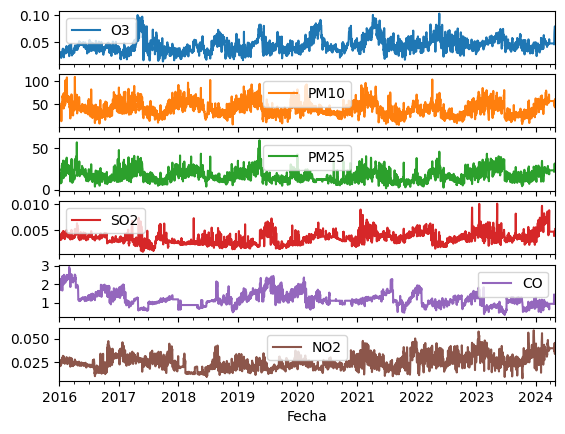

In [443]:
# Series de tiempo
df_contam_puebla.plot(subplots=True)
plt.show()

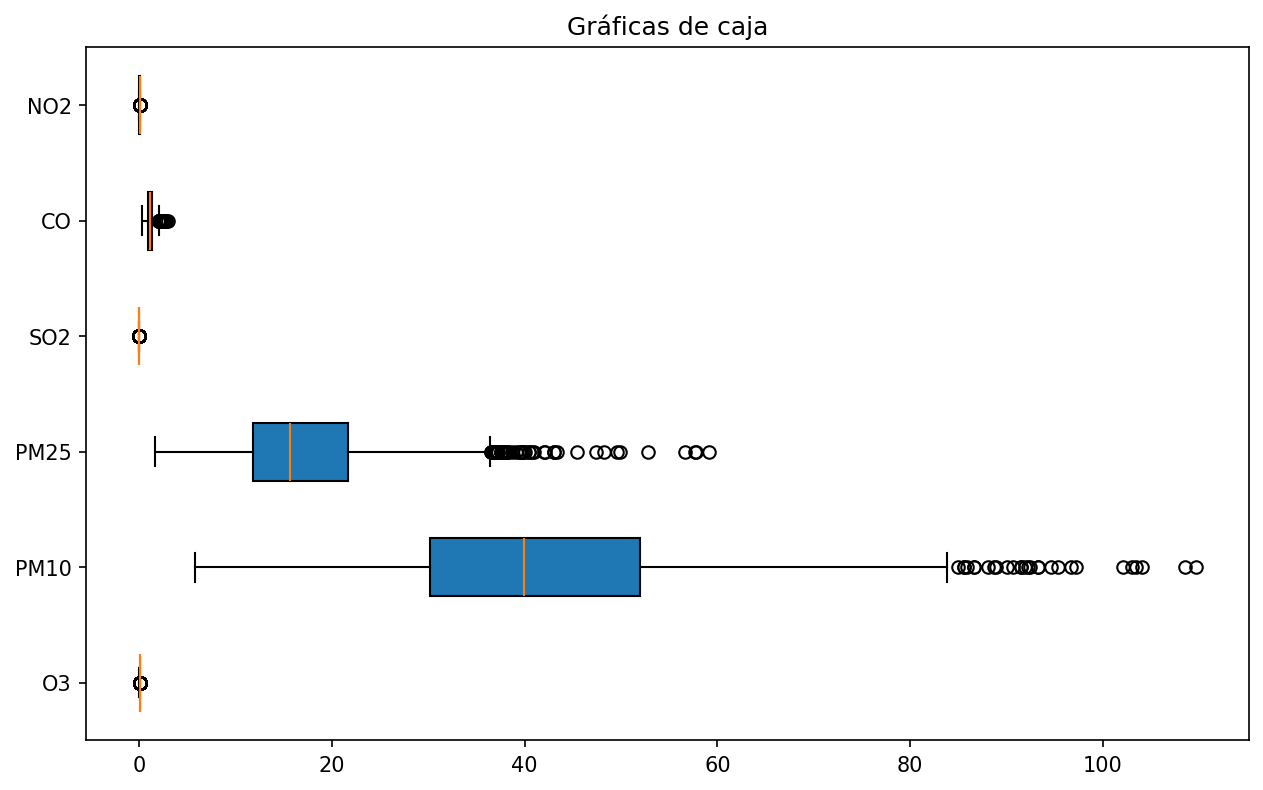

In [444]:
# gráficas de caja
plt.figure(figsize=(10,6), dpi = 150)
plt.boxplot(df_contam_puebla, tick_labels=df_contam_puebla.columns, vert = False, patch_artist=True)
plt.title('Gráficas de caja')
plt.show()

In [445]:
# contar los valores atípicos de cada contaminante
df_contam_puebla.describe()

,O3,PM10,PM25,SO2,CO,NO2
count,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000
mean,0.044932,41.575854,17.122126,0.003486,1.195836,0.025427
std,0.013539,15.498889,7.403356,0.001189,0.398137,0.007780
min,0.014422,5.739899,1.666667,0.000856,0.326635,0.007823
25%,0.035606,30.194444,11.781840,0.002627,0.931935,0.020079
50%,0.042851,39.930556,15.692633,0.003374,1.114111,0.024406
75%,0.051064,51.951389,21.654891,0.004087,1.370332,0.030052
max,0.103337,109.680556,59.158432,0.010058,2.932127,0.059077


In [446]:
val_atipicos = {}

for col in df_contam_puebla.columns:
    datos = df_contam_puebla[col].dropna().values
    datos_ordenados = sorted(datos)
    n = len(datos_ordenados)

    # Calcular Q1 y Q3
    mitad = n // 2
    if n % 2 == 0:
        Q1 = (datos_ordenados[mitad // 2 - 1] + datos_ordenados[mitad // 2]) / 2
        Q3 = (datos_ordenados[mitad + mitad // 2 - 1] + datos_ordenados[mitad + mitad // 2]) / 2
    else:
        Q1 = datos_ordenados[mitad // 2]
        Q3 = datos_ordenados[mitad + (mitad // 2) + 1]

    # Rango intercuartílico (IQR)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Contar datos atípicos
    contador = 0
    for valor in datos:
        if valor < lim_inf or valor > lim_sup:
            contador += 1

    val_atipicos[col] = contador

# Mostrar resultados
print("Número de datos atípicos:")
for contam, n_final in val_atipicos.items():
    print(f"{contam}: {n_final}")


Número de datos atípicos:
O3: 136
PM10: 28
PM25: 51
SO2: 82
CO: 145
NO2: 40


b) Realice una prueba de contraste de normalidad para los datos. Obtenga una matriz de correlación y un mapa de calor de los contaminantes utilizando el coeficiente de correlación apropiado.

In [447]:
df_contam_puebla.columns


Index(['O3', 'PM10', 'PM25', 'SO2', 'CO', 'NO2'], dtype='object')

In [448]:
columnas = ['O3', 'PM10', 'PM25', 'SO2', 'CO', 'NO2']

for col in columnas:
    estadistico, p_value = shapiro(df_contam_puebla[col])
    print(f'{col}:  Estadístico = {estadistico:.3f}, p-value = {p_value:.10f}\n')

O3:  Estadístico = 0.948, p-value = 0.0000000000

PM10:  Estadístico = 0.978, p-value = 0.0000000000

PM25:  Estadístico = 0.947, p-value = 0.0000000000

SO2:  Estadístico = 0.952, p-value = 0.0000000000

CO:  Estadístico = 0.940, p-value = 0.0000000000

NO2:  Estadístico = 0.973, p-value = 0.0000000000



como todos los $valores-p < 0.05$ implica que no siguen una distribución normal

Por tanto ya no es opión utilizar el coeficiente de correlación de Pearson y **se utilizará el coeficiente de correlación de Spearman** $\rho$

In [449]:
# Coeficiente de Spearman
df_contam_puebla.corr(method='spearman')

,O3,PM10,PM25,SO2,CO,NO2
O3,1.000000,0.153624,0.222908,0.181364,-0.140142,0.152639
PM10,0.153624,1.000000,0.801181,0.184809,0.077875,0.295981
PM25,0.222908,0.801181,1.000000,0.144050,-0.010204,0.315743
SO2,0.181364,0.184809,0.144050,1.000000,0.133664,0.340807
CO,-0.140142,0.077875,-0.010204,0.133664,1.000000,-0.007370
NO2,0.152639,0.295981,0.315743,0.340807,-0.007370,1.000000


In [450]:
matriz_corr = df_contam_puebla.corr(method='spearman')


Matriz de correlación

In [451]:
import seaborn as sns

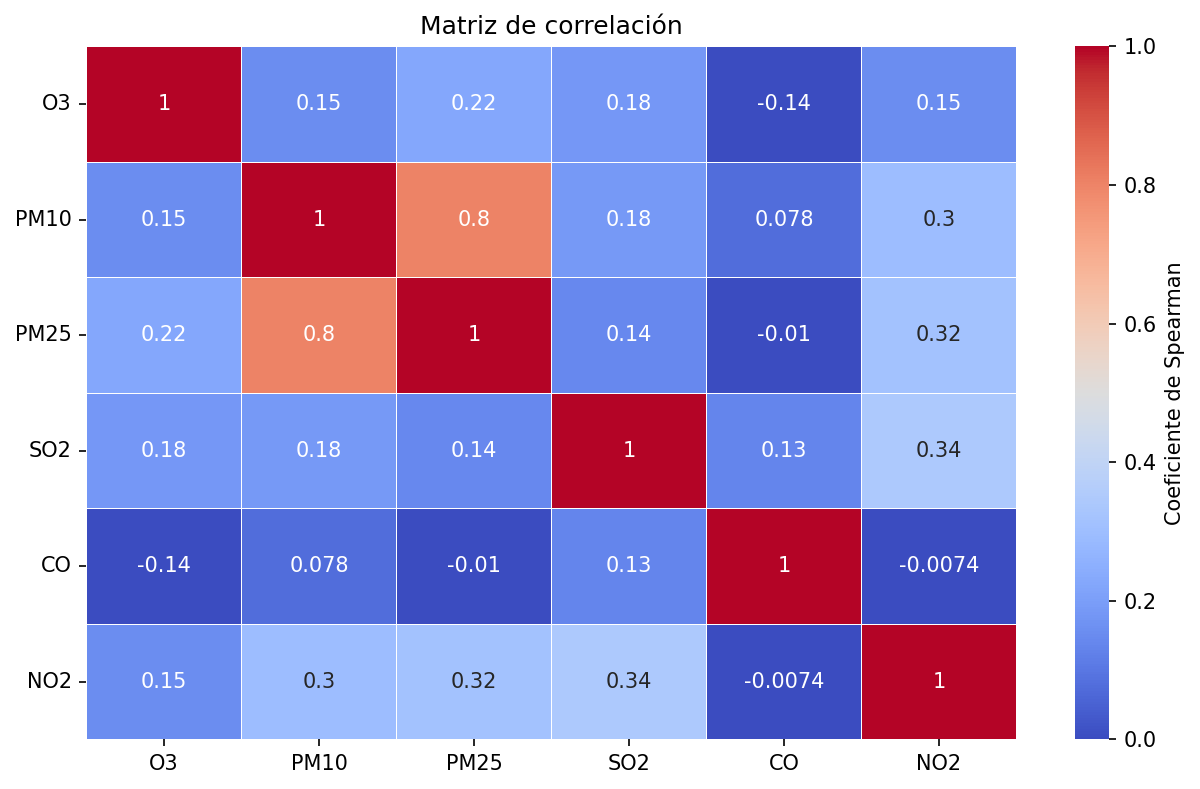

In [452]:
plt.figure(figsize=(10,6), dpi =150)
sns.heatmap(matriz_corr, annot=True, # annot=True:muestra los elementos de la matriz
            cmap='coolwarm',
            linewidths=0.3,
            cbar_kws={'label': 'Coeficiente de Spearman'},
           vmin = 0, vmax = 1, center = 0.5)
plt.title('Matriz de correlación', fontsize = 12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

se puede apreciar que los contaminantes que mas se correlacionan son el material particulado PM10 y PM2.5 y es de esperarse ya que las particulas PM2.5
están contenidas en los PM10 como contaminantes primarios, las correlaciones positivas indican que son directamente proporcionales y las correlaciones negativas que son inversamente proporcionales los contaminantes

c) Obtenga un DataFrame que muestre la correlación 2 a 2 entre los contaminantes.
Grafique 3 diagramas de dispersión entre los contaminantes que presentan mayor correlación, ya sea positiva o negativa.

In [453]:
pip install pingouin # se instala la paquetería

In [476]:
import pingouin as pg

corr = pg.pairwise_corr(data= df_contam_puebla, method= 'spearman')

In [477]:
corr.round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,O3,PM10,spearman,two-sided,3043,0.154,"[0.12, 0.19]",0.000,1.000
1,O3,PM25,spearman,two-sided,3043,0.223,"[0.19, 0.26]",0.000,1.000
2,O3,SO2,spearman,two-sided,3043,0.181,"[0.15, 0.22]",0.000,1.000
3,O3,CO,spearman,two-sided,3043,-0.140,"[-0.17, -0.11]",0.000,1.000
4,O3,NO2,spearman,two-sided,3043,0.153,"[0.12, 0.19]",0.000,1.000
5,PM10,PM25,spearman,two-sided,3043,0.801,"[0.79, 0.81]",0.000,1.000
6,PM10,SO2,spearman,two-sided,3043,0.185,"[0.15, 0.22]",0.000,1.000
7,PM10,CO,spearman,two-sided,3043,0.078,"[0.04, 0.11]",0.000,0.990
8,PM10,NO2,spearman,two-sided,3043,0.296,"[0.26, 0.33]",0.000,1.000
9,PM25,SO2,spearman,two-sided,3043,0.144,"[0.11, 0.18]",0.000,1.000


In [480]:
corr.sort_values(by=['r'], ascending=False)[['X','Y','r']].round(3)


,X,Y,r
5,PM10,PM25,0.801
13,SO2,NO2,0.341
11,PM25,NO2,0.316
8,PM10,NO2,0.296
1,O3,PM25,0.223
6,PM10,SO2,0.185
2,O3,SO2,0.181
0,O3,PM10,0.154
4,O3,NO2,0.153
9,PM25,SO2,0.144


DataFrame que muestra la correlación 2 a 2 entre los contamiantes


In [457]:
corr.sort_values(by=['r'], ascending=False)[['X','Y','r']].round(3) # ordenados


,X,Y,r
5,PM10,PM25,0.801
13,SO2,NO2,0.341
11,PM25,NO2,0.316
8,PM10,NO2,0.296
1,O3,PM25,0.223
6,PM10,SO2,0.185
2,O3,SO2,0.181
0,O3,PM10,0.154
4,O3,NO2,0.153
9,PM25,SO2,0.144


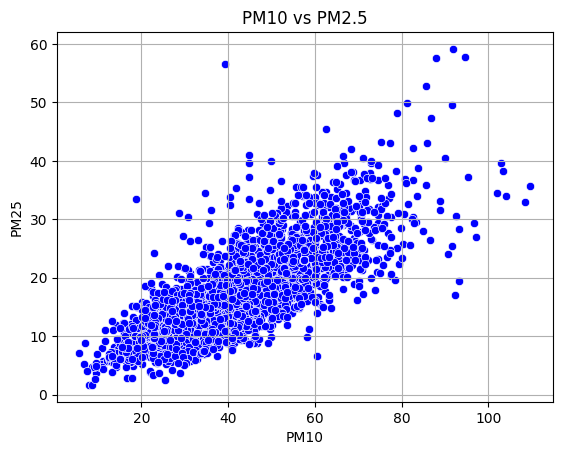

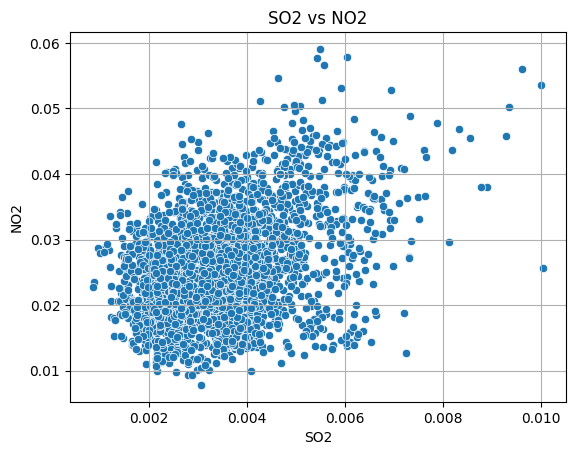

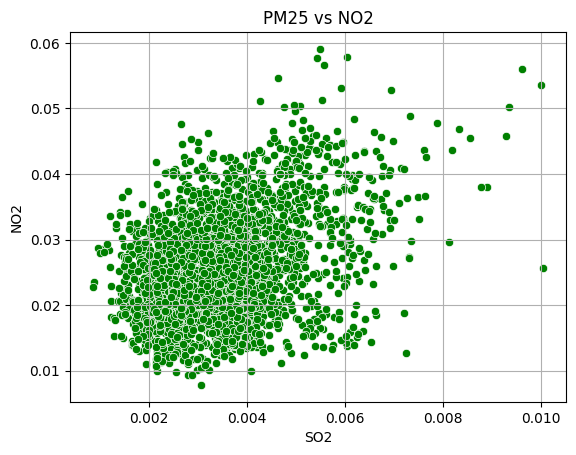

In [458]:
# se elige graficar 3 diagramas de dispersión de 3 correlaciones positivas
# 1. PM10 vs PM2.5 ya que son los  más correlacionados
sns.scatterplot(data=df_contam_puebla, x='PM10', y='PM25', color = 'blue')
plt.title('PM10 vs PM2.5')
plt.grid(True)
plt.show()

# 2. SO2 vs NO2
sns.scatterplot(data=df_contam_puebla, x='SO2', y='NO2')
plt.title('SO2 vs NO2')
plt.grid(True)
plt.show()

# 3. PM2.5 vs NO2

sns.scatterplot(data=df_contam_puebla, x='SO2', y='NO2', color= 'green')
plt.title('PM25 vs NO2')
plt.grid(True)
plt.show()

claramente se observa que están correlacionados PM10 y PM2.5 de forma un poco lineal

d) Aplique el test de Mann-Kendall a todos los contaminantes y obtenga una gráfica con la línea de tendencia de cada uno (en caso de que exista).

In [459]:
pip install pymannkendall # se instala la paquetería

In [460]:
import pymannkendall as mk


Dado que los datos no son normalmente distribuidos se aplica la prueba o test de Mann-Kendall

In [461]:
resultado = mk.original_test(df_contam_puebla['PM10'], alpha = 0.05)
resultado # se genera una lista inmutable (tupla)

Mann_Kendall_Test(trend='decreasing', h=np.True_, p=np.float64(6.661338147750939e-15), z=np.float64(-7.7914418728468355), Tau=np.float64(-0.09421629879679881), s=np.float64(-436071.0), var_s=np.float64(3132396641.6666665), slope=np.float64(-0.0025048446024340293), intercept=np.float64(43.740424195857706))

el resultado de la prueba indica que hay una tendencia decreciente en los datos de contaminantes de la ciudad de Puebla

In [462]:
for val in df_contam_puebla.columns:
    resultado = mk.original_test(df_contam_puebla[val], alpha = 0.05)
    print(val)
    for val_1 in resultado: print(val_1)
    print('\n')

O3
increasing
True
0.0
17.591507915746828
0.21272110488218074
984559.0
3132394657.6666665
4.097957091780723e-06
0.036618215678404814


PM10
decreasing
True
6.661338147750939e-15
-7.7914418728468355
-0.09421629879679881
-436071.0
3132396641.6666665
-0.0025048446024340293
43.740424195857706


PM25
decreasing
True
0.01117620157945054
-2.537140732486618
-0.030679912704230813
-141999.0
3132386471.0
-0.0003692726766993715
16.254296591501287


SO2
increasing
True
0.0
15.533965649282166
0.18784081680009282
869403.0
3132395482.3333335
3.6216698450634786e-07
0.0028233345947905448


CO
decreasing
True
0.0
-18.73453024620918
-0.22653321242769914
-1048487.0
3132129109.6666665
-0.00013034442788541125
1.3123647582381186


NO2
increasing
True
0.0
17.235795094562977
0.208419621195475
964650.0
3132391177.3333335
2.8175689112537964e-06
0.020120591073960775




como en todos los contaminante hubo una tendencia (creiciente o decreciente) se grafican las tendencias de cada uno, para una tendencia creciente significa que conforme pasa el tiempo el contaminante aumenta, mientras que para una tendencia decreciente indica que conforme pasa el tiempo el contaminante disminuye

La pendiente es:  4.097957091780723e-06 El intercepto es: 0.036618215678404814


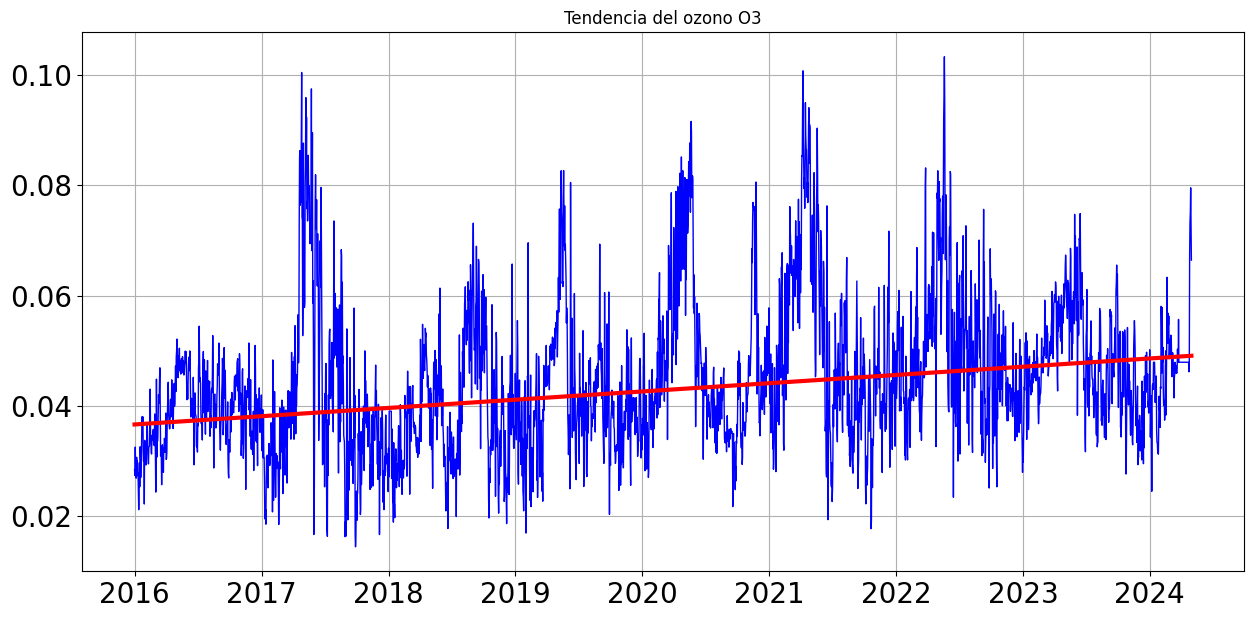

In [463]:
# Tendencia del ozono O3
# pendiente e intercepto
slope = mk.original_test(df_contam_puebla['O3'], alpha = 0.05).slope # pendiente
intercepto = mk.original_test(df_contam_puebla['O3'], alpha = 0.05).intercept # intercepto
print("La pendiente es: ",slope, "El intercepto es:" ,intercepto)


# se genera la línea (recta)
linea = [] # se genera la línea recta
for x in range(0, len(df_contam_puebla)):
  linea.append(slope*x + intercepto)

linea = pd.DataFrame(linea, index =df_contam_puebla.index) # se convierte en un dataframe y
# se indexa ya que son del msimo tamnño
linea

# se traza la recta
plt.figure(figsize=(15,7), dpi=100)
plt.title('Tendencia del ozono O3')
plt.plot(df_contam_puebla["O3"],lw=1, color='blue')
plt.plot(linea,lw=3, color='red')
plt.tick_params(labelsize=20)
plt.grid(True)

se obtiene una tendencia creciente

La pendiente es:  -0.0025048446024340293 El intercepto es: 43.740424195857706


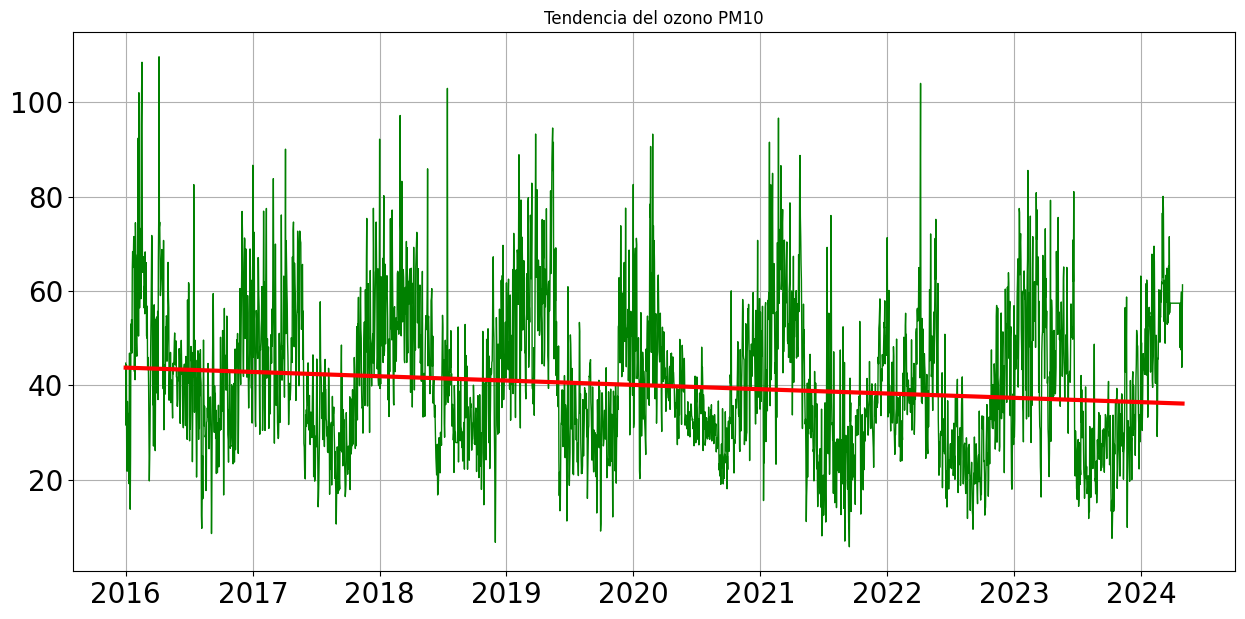

In [464]:
# Tendencia del ozono PM10
# pendiente e intercepto
slope = mk.original_test(df_contam_puebla['PM10'], alpha = 0.05).slope # pendiente
intercepto = mk.original_test(df_contam_puebla['PM10'], alpha = 0.05).intercept # intercepto
print("La pendiente es: ",slope, "El intercepto es:" ,intercepto)


# se genera la línea (recta)
linea = [] # se genera la línea recta
for x in range(0, len(df_contam_puebla)):
  linea.append(slope*x + intercepto)

linea = pd.DataFrame(linea, index =df_contam_puebla.index) # se convierte en un dataframe y
# se indexa ya que son del msimo tamnño
linea

# se traza la recta
plt.figure(figsize=(15,7), dpi=100)
plt.title('Tendencia del ozono PM10')
plt.plot(df_contam_puebla["PM10"],lw=1, color='green')
plt.plot(linea,lw=3, color='red')
plt.tick_params(labelsize=20)
plt.grid(True)

se observa tendencia decreciente

La pendiente es:  -0.0003692726766993715 El intercepto es: 16.254296591501287


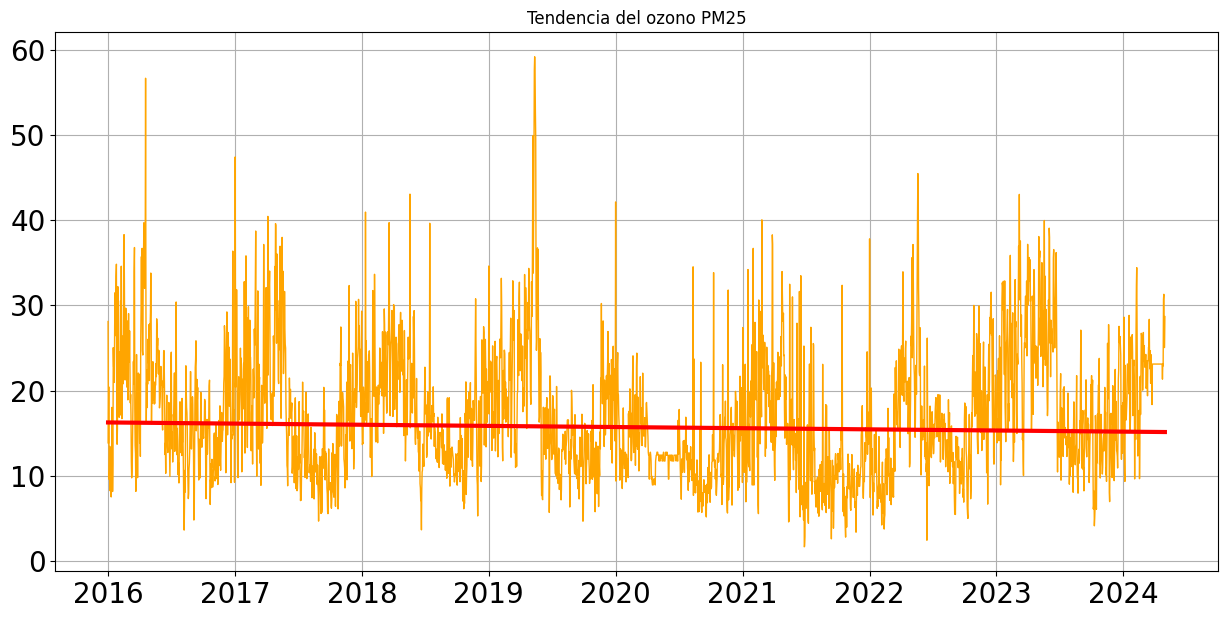

In [465]:
# Tendencia del ozono PM2.5
# pendiente e intercepto
slope = mk.original_test(df_contam_puebla['PM25'], alpha = 0.05).slope # pendiente
intercepto = mk.original_test(df_contam_puebla['PM25'], alpha = 0.05).intercept # intercepto
print("La pendiente es: ",slope, "El intercepto es:" ,intercepto)


# se genera la línea (recta)
linea = [] # se genera la línea recta
for x in range(0, len(df_contam_puebla)):
  linea.append(slope*x + intercepto)

linea = pd.DataFrame(linea, index =df_contam_puebla.index) # se convierte en un dataframe y
# se indexa ya que son del msimo tamnño
linea

# se traza la recta
plt.figure(figsize=(15,7), dpi=100)
plt.title('Tendencia del ozono PM25')
plt.plot(df_contam_puebla["PM25"],lw=1, color='orange')
plt.plot(linea,lw=3, color='red')
plt.tick_params(labelsize=20)
plt.grid(True)

se observa tendencia decreciente

La pendiente es:  3.6216698450634786e-07 El intercepto es: 0.0028233345947905448


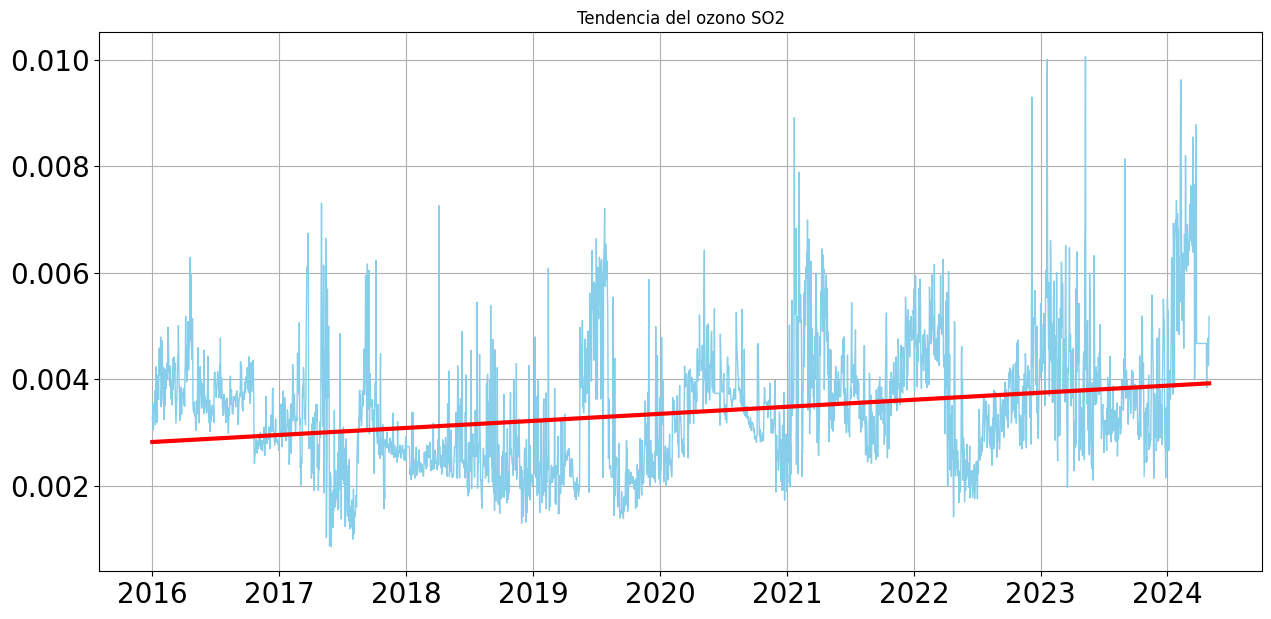

In [466]:
# Tendencia del ozono SO2
# pendiente e intercepto
slope = mk.original_test(df_contam_puebla['SO2'], alpha = 0.05).slope # pendiente
intercepto = mk.original_test(df_contam_puebla['SO2'], alpha = 0.05).intercept # intercepto
print("La pendiente es: ",slope, "El intercepto es:" ,intercepto)


# se genera la línea (recta)
linea = [] # se genera la línea recta
for x in range(0, len(df_contam_puebla)):
  linea.append(slope*x + intercepto)

linea = pd.DataFrame(linea, index =df_contam_puebla.index) # se convierte en un dataframe y
# se indexa ya que son del msimo tamnño
linea

# se traza la recta
plt.figure(figsize=(15,7), dpi=100)
plt.title('Tendencia del ozono SO2')
plt.plot(df_contam_puebla["SO2"],lw=1, color='skyblue')
plt.plot(linea,lw=3, color='red')
plt.tick_params(labelsize=20)
plt.grid(True)

se observa tendencia creciente

La pendiente es:  -0.00013034442788541125 El intercepto es: 1.3123647582381186


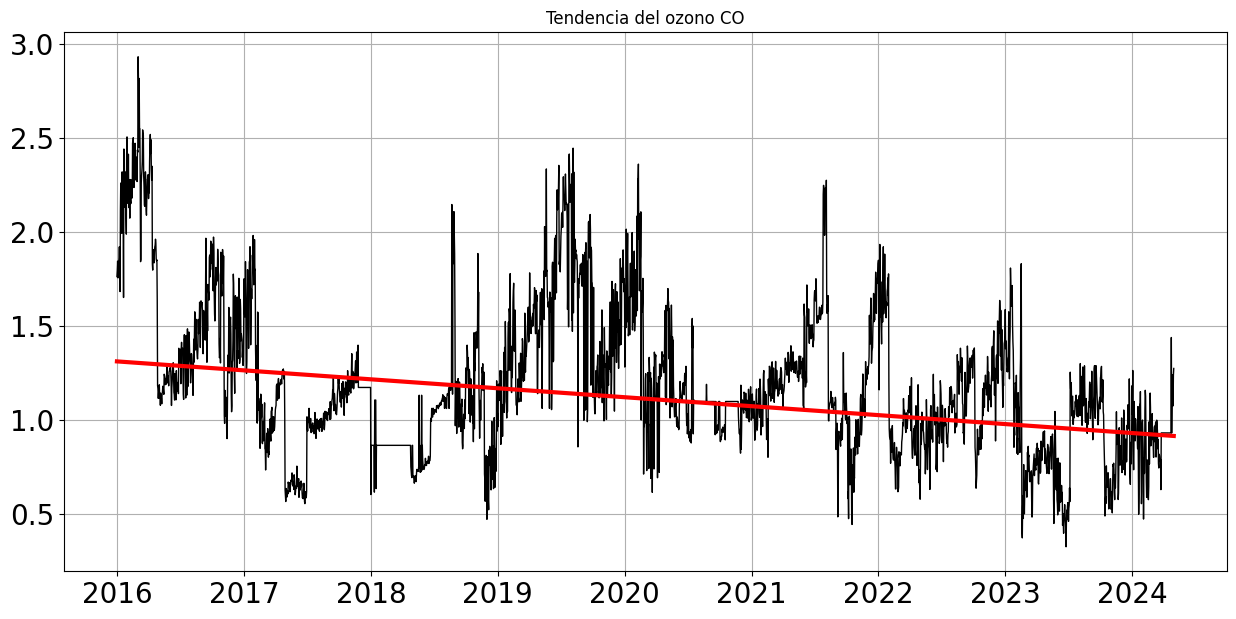

In [467]:
# Tendencia del ozono CO
# pendiente e intercepto
slope = mk.original_test(df_contam_puebla['CO'], alpha = 0.05).slope # pendiente
intercepto = mk.original_test(df_contam_puebla['CO'], alpha = 0.05).intercept # intercepto
print("La pendiente es: ",slope, "El intercepto es:" ,intercepto)


# se genera la línea (recta)
linea = [] # se genera la línea recta
for x in range(0, len(df_contam_puebla)):
  linea.append(slope*x + intercepto)

linea = pd.DataFrame(linea, index =df_contam_puebla.index) # se convierte en un dataframe y
# se indexa ya que son del msimo tamnño
linea

# se traza la recta
plt.figure(figsize=(15,7), dpi=100)
plt.title('Tendencia del ozono CO')
plt.plot(df_contam_puebla["CO"],lw=1, color='black')
plt.plot(linea,lw=3, color='red')
plt.tick_params(labelsize=20)
plt.grid(True)

se observa tendencia decreciente

La pendiente es:  2.8175689112537964e-06 El intercepto es: 0.020120591073960775


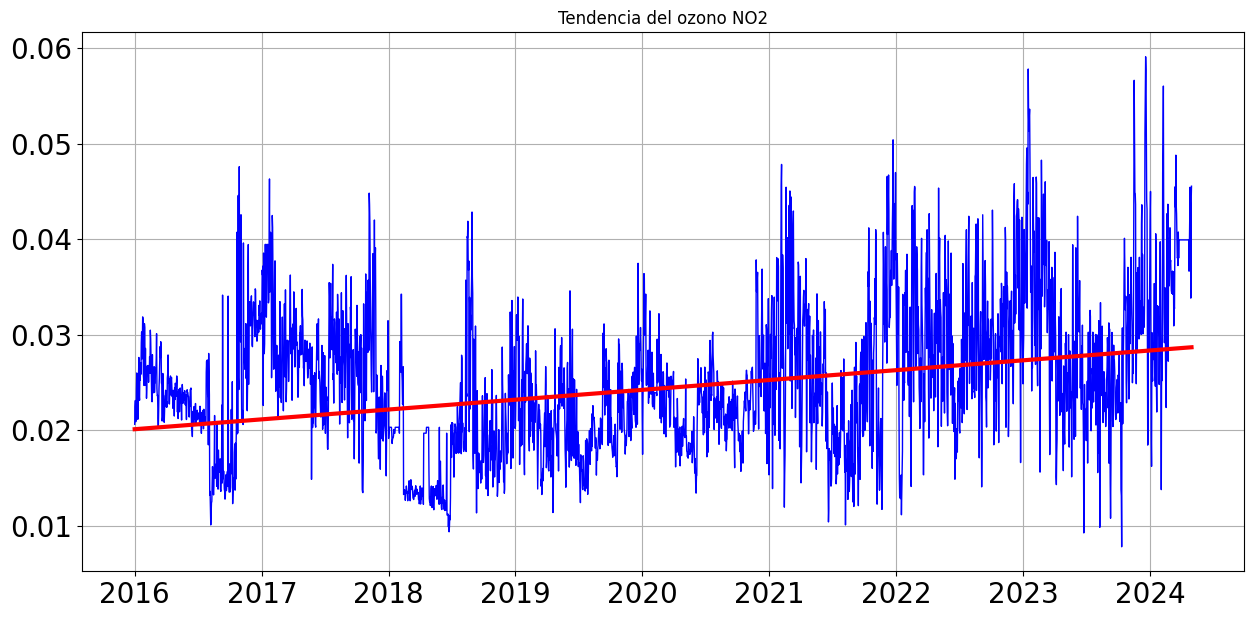

In [468]:
# Tendencia del ozono NO2
# pendiente e intercepto
slope = mk.original_test(df_contam_puebla['NO2'], alpha = 0.05).slope # pendiente
intercepto = mk.original_test(df_contam_puebla['NO2'], alpha = 0.05).intercept # intercepto
print("La pendiente es: ",slope, "El intercepto es:" ,intercepto)


# se genera la línea (recta)
linea = [] # se genera la línea recta
for x in range(0, len(df_contam_puebla)):
  linea.append(slope*x + intercepto)

linea = pd.DataFrame(linea, index =df_contam_puebla.index) # se convierte en un dataframe y
# se indexa ya que son del msimo tamnño
linea

# se traza la recta
plt.figure(figsize=(15,7), dpi=100)
plt.title('Tendencia del ozono NO2')
plt.plot(df_contam_puebla["NO2"],lw=1, color='blue')
plt.plot(linea,lw=3, color='red')
plt.tick_params(labelsize=20)
plt.grid(True)

se observa tendencia creciente

e) Se verifica la existencia de tendencia mediante el método ITA (Innovative Trend Analysis).

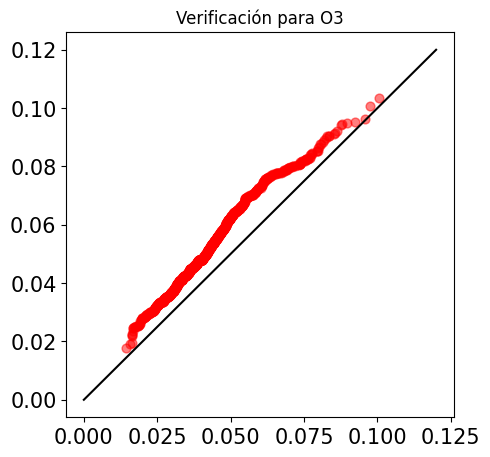

In [469]:
# Para O3
p1 = df_contam_puebla["O3"].iloc[0:int(len(df_contam_puebla)/2)]
p2 = df_contam_puebla["O3"].iloc[int(len(df_contam_puebla)/2):2*int(len(df_contam_puebla)/2)]


fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='red', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 0.12
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.title("Verificación para O3")
plt.show()

como la mayoría de los puntos están arriba de la recta indica una tendencia creciente

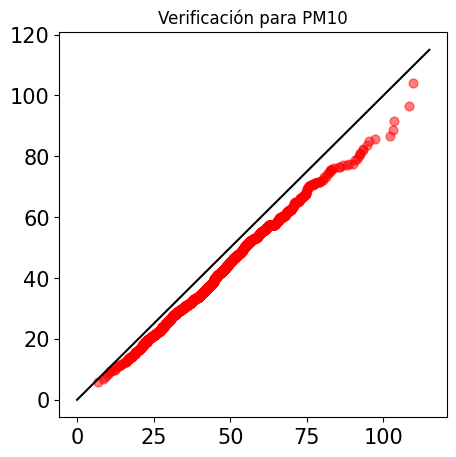

In [470]:
# Para PM10
p1 = df_contam_puebla["PM10"].iloc[0:int(len(df_contam_puebla)/2)]
p2 = df_contam_puebla["PM10"].iloc[int(len(df_contam_puebla)/2):2*int(len(df_contam_puebla)/2)]


fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='red', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 115
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.title("Verificación para PM10")
plt.show()

como la mayor parte de los puntos están debajo de la recta indica una tendencia decreciente

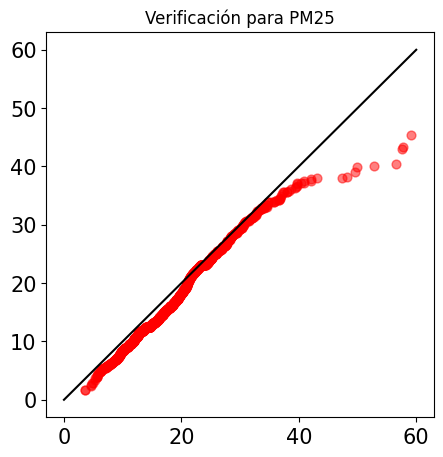

In [471]:
# Para PM2.5
p1 = df_contam_puebla["PM25"].iloc[0:int(len(df_contam_puebla)/2)]
p2 = df_contam_puebla["PM25"].iloc[int(len(df_contam_puebla)/2):2*int(len(df_contam_puebla)/2)]


fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='red', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 60
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.title("Verificación para PM25")
plt.show()

como la mayor parte de los puntos están debajo de la recta indica una tendencia decreciente

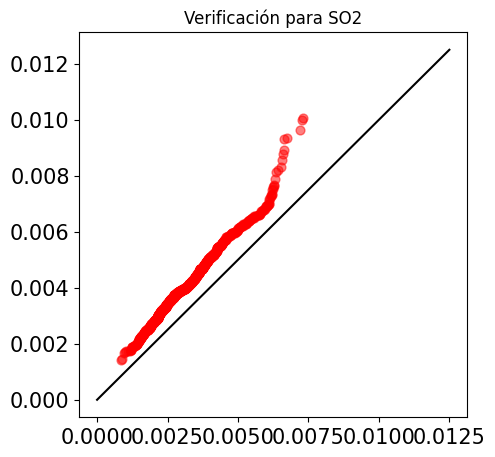

In [472]:
# Para SO2
p1 = df_contam_puebla["SO2"].iloc[0:int(len(df_contam_puebla)/2)]
p2 = df_contam_puebla["SO2"].iloc[int(len(df_contam_puebla)/2):2*int(len(df_contam_puebla)/2)]


fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='red', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 0.0125
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.title("Verificación para SO2")
plt.show()

como la mayor parte de los puntos están arriba de la recta indica una tendencia creciente

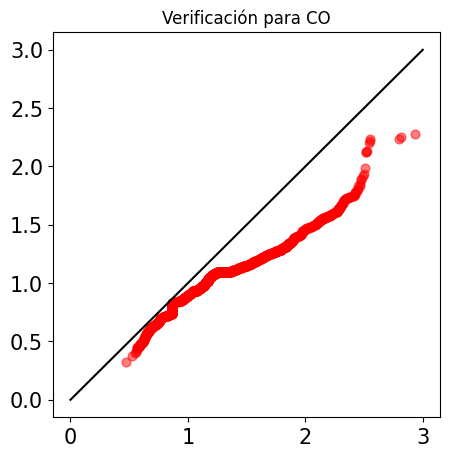

In [473]:
# Para CO
p1 = df_contam_puebla["CO"].iloc[0:int(len(df_contam_puebla)/2)]
p2 = df_contam_puebla["CO"].iloc[int(len(df_contam_puebla)/2):2*int(len(df_contam_puebla)/2)]


fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='red', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 3
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.title("Verificación para CO")
plt.show()

como la mayor parte de los puntos están debajo de la recta indica una tendencia decreciente

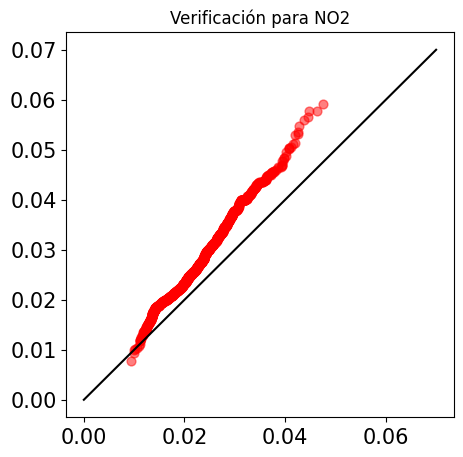

In [474]:
# Para NO2
p1 = df_contam_puebla["NO2"].iloc[0:int(len(df_contam_puebla)/2)]
p2 = df_contam_puebla["NO2"].iloc[int(len(df_contam_puebla)/2):2*int(len(df_contam_puebla)/2)]


fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='red', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 0.07
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.title("Verificación para NO2")
plt.show()

como la mayor parte de los puntos están arriba de la recta indica una tendencia creciente, POR LO QUE CONCUERDA CON EL INCISO ANTERIOR, así se comprueban las tendencias de los contaminantes mediante el método ITA